In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
import os

In [2]:
# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

In [3]:
# Function to preprocess image and extract features
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    features = model.predict(img_array)
    return features.flatten()

In [7]:
# Directory paths for each category
tshirt_dir = "T-Shirt"
watch_dir = "Watch"
shoes_dir = "shoes"
pants_dir = "Jeans"

In [8]:
# Extract features for all t-shirt, watch, shoes, and pants images
tshirt_features = []
watch_features = []
shoes_features = []
pants_features = []

tshirt_images = os.listdir(tshirt_dir)
watch_images = os.listdir(watch_dir)
shoes_images = os.listdir(shoes_dir)
pants_images = os.listdir(pants_dir)

In [9]:
# Extract features for all t-shirt images
for img_name in tshirt_images:
    img_path = os.path.join(tshirt_dir, img_name)
    tshirt_features.append(extract_features(img_path, model))

# Extract features for all watch images
for img_name in watch_images:
    img_path = os.path.join(watch_dir, img_name)
    watch_features.append(extract_features(img_path, model))

# Extract features for all shoes images
for img_name in shoes_images:
    img_path = os.path.join(shoes_dir, img_name)
    shoes_features.append(extract_features(img_path, model))

# Extract features for all pants images
for img_name in pants_images:
    img_path = os.path.join(pants_dir, img_name)
    pants_features.append(extract_features(img_path, model))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━

In [10]:
# Convert lists to numpy arrays
tshirt_features = np.array(tshirt_features)
watch_features = np.array(watch_features)
shoes_features = np.array(shoes_features)
pants_features = np.array(pants_features)

In [11]:
from sklearn.neighbors import NearestNeighbors

In [12]:
# Fit KNN models for each category (watch, shoes, pants)
watch_knn = NearestNeighbors(n_neighbors=1, metric='euclidean')
watch_knn.fit(watch_features)

shoes_knn = NearestNeighbors(n_neighbors=1, metric='euclidean')
shoes_knn.fit(shoes_features)

pants_knn = NearestNeighbors(n_neighbors=1, metric='euclidean')
pants_knn.fit(pants_features)

NearestNeighbors(metric='euclidean', n_neighbors=1)

In [13]:
# Function to recommend items for a given t-shirt
def recommend_items(tshirt_img_path):
    # Extract features for the input t-shirt image
    tshirt_feature = extract_features(tshirt_img_path, model).reshape(1, -1)

    # Find the nearest watch, shoes, and pants based on the t-shirt
    watch_index = watch_knn.kneighbors(tshirt_feature, return_distance=False)[0][0]
    shoes_index = shoes_knn.kneighbors(tshirt_feature, return_distance=False)[0][0]
    pants_index = pants_knn.kneighbors(tshirt_feature, return_distance=False)[0][0]

    # Return recommended watch, shoes, and pants
    recommended_watch = watch_images[watch_index]
    recommended_shoes = shoes_images[shoes_index]
    recommended_pants = pants_images[pants_index]

    return recommended_watch, recommended_shoes, recommended_pants

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Recommended watch: 13052.jpg, shoes: 2500.jpg, pants: 12678.jpg


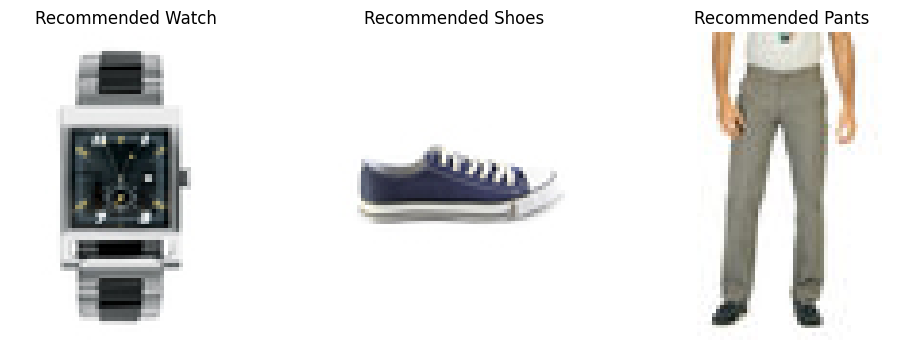

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Test the recommendation system
tshirt_img = r'C:\Users\nidhi\OneDrive\Desktop\FRC\T-Shirt\12582.jpg'
watch, shoes, pants = recommend_items(tshirt_img)
print(f"Recommended watch: {watch}, shoes: {shoes}, pants: {pants}")

# Directories for images (adjust these to match your actual paths)
watch_dir = "Watch"
shoes_dir = "shoes"
pants_dir = "Jeans"

# Function to display an image with a title
def display_image(img_path, title):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

# Full paths to the recommended images
watch_img_path = os.path.join(watch_dir, watch)
shoes_img_path = os.path.join(shoes_dir, shoes)
pants_img_path = os.path.join(pants_dir, pants)

# Plotting the recommended images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
display_image(watch_img_path, 'Recommended Watch')

plt.subplot(1, 3, 2)
display_image(shoes_img_path, 'Recommended Shoes')

plt.subplot(1, 3, 3)
display_image(pants_img_path, 'Recommended Pants')

plt.show()
